# Notebook to reproduce Fig 1d

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np

from mbhl import *

In [2]:
%mkdir -p subfigs-Fig1-d

`plot_honeycomb` function renders the patterns formed by n-beam interference on a honeycomb lattice nanoaperture

In [3]:
def plot_honeycomb(
    ax,
    # zenith angle in degrees
    phi=5.0,
    # circle diameter
    diameter=50 * nm,
    # non-directinal diffusion
    diffusion=15 * nm,
    # directional drift
    drift=0 * nm,
    # mesh spacing
    default_h=5 * nm,
    # edge-to-edge distance between circles
    # at bottom edge
    spacing_bottom=300 * nm,
    lim=(0.5 * um, 3.5 * um, 0.5 * um, 3.5 * um),
    gap=2.5 * um,
    cmap="viridis",
    alpha=1.0,
    h_ratio=1.0,
    n_pts=1,
    angle_offset=30,
    mask_only=False,
    show_mask=False,
):
    phi = np.deg2rad(phi)
    theta_0 = np.deg2rad(angle_offset)
    r = diameter / 2
    L = (diameter + spacing_bottom) / np.sqrt(3)
    geometry = honeycomb_hole_lattice(r, L)
    stencil = Stencil(geometry, thickness=100 * nm, gap=gap, h=default_h)
    # Generate a trajectory for physics
    traj = n_beam_trajectory(phi, theta_0=theta_0, n_pts=n_pts)
    phys = Physics(trajectory=traj, diffusion=diffusion, drift=drift)
    system = System(stencil=stencil, physics=phys)
    cw, ch = stencil.cell
    repeat_x, repeat_y = int(np.ceil(lim[1] / cw)), int(np.ceil(lim[3] / ch))
    if not mask_only:
        system.simulate(method="fft")
        ax.set_axis_off()
        system.draw(
            ax,
            repeat=(repeat_x, repeat_y),
            mask_alpha=1.0,
            show_mask=show_mask,
            domain=lim,
            cmap=cmap,
            mask_lw=2.5,
            mask_color="white",
            alpha=alpha,
        )
    else:
        stencil.draw(ax, h=2.5 * nm, cmap="gray", vmax=None)
        ax.set_axis_off()
    return

1. Plot the honeycomb lattice offseted by 1 beam, showing the original nanoaperture positions

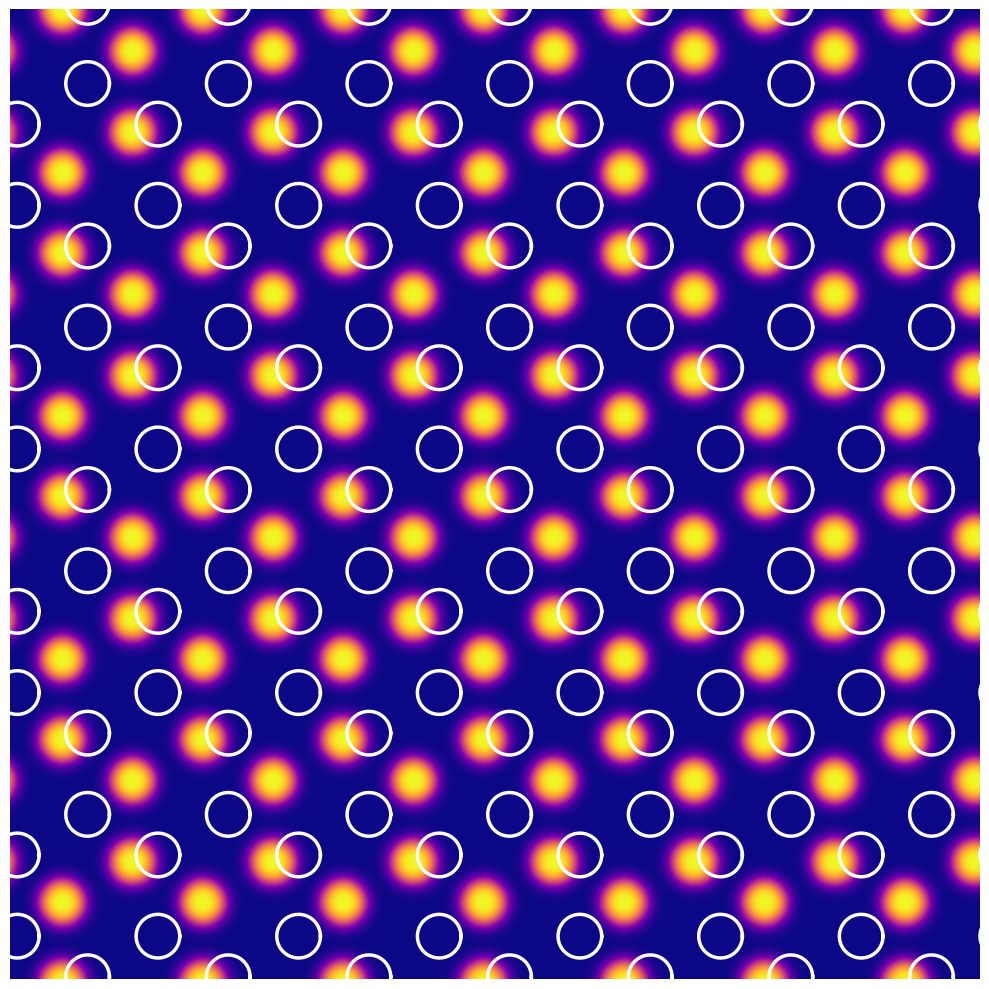

In [4]:
fig, ax = plt.subplots(figsize=(10, 10))
pts = 1
plot_honeycomb(
    ax,
    n_pts=pts,
    cmap="plasma",
    angle_offset=45,
    diameter=90 * nm,
    phi=3,
    gap=2.5 * um,
    default_h=5 * nm,
    lim=(1 * um, 3.0 * um, 1 * um, 3.0 * um),
    spacing_bottom=200 * nm,
    show_mask=True,
)
plt.tight_layout()
plt.savefig(f"subfigs-Fig1-d/honeycomb-{pts}pt-with-stencil.png")

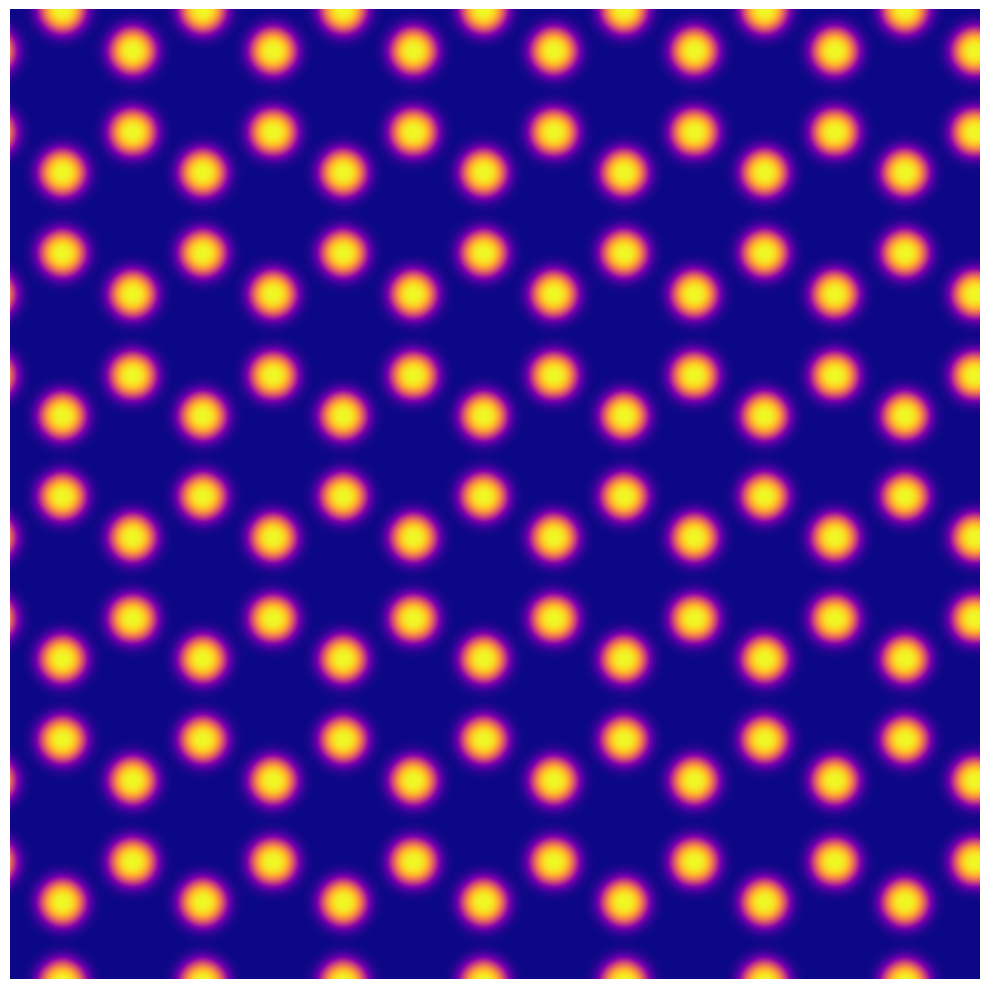

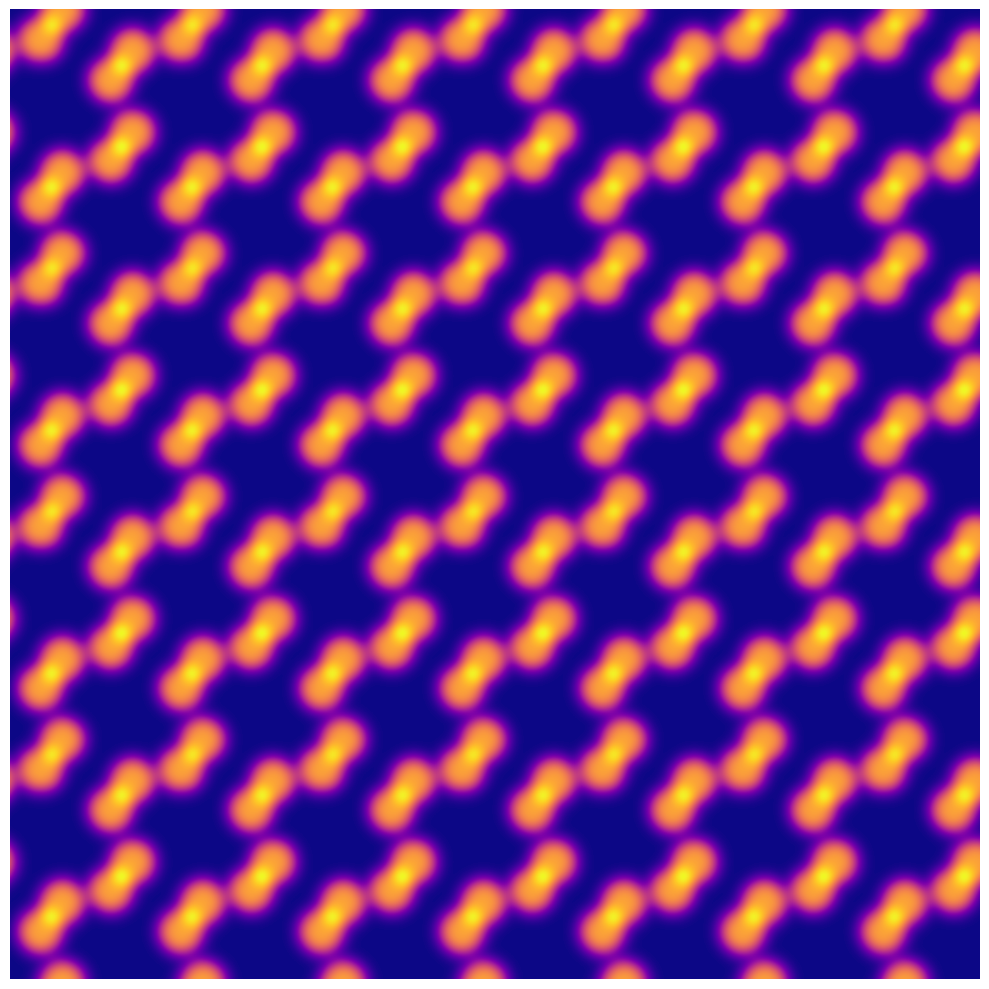

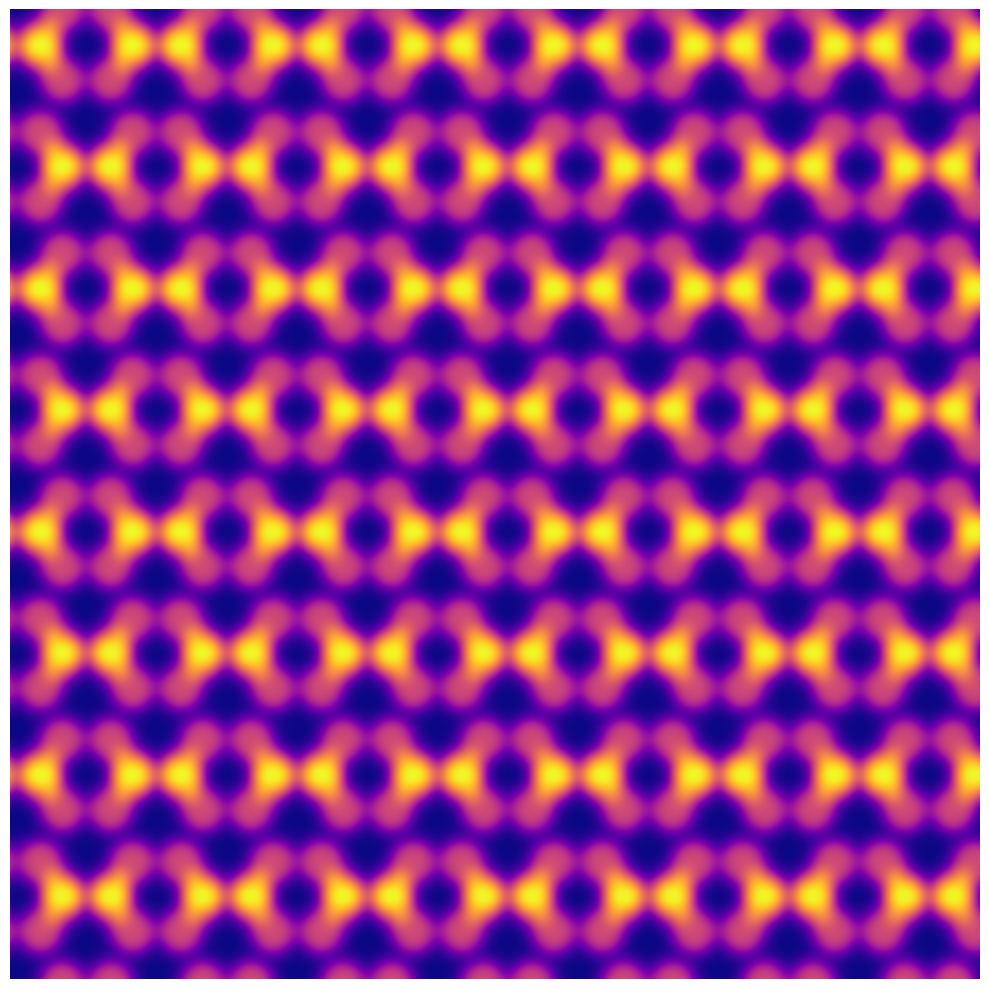

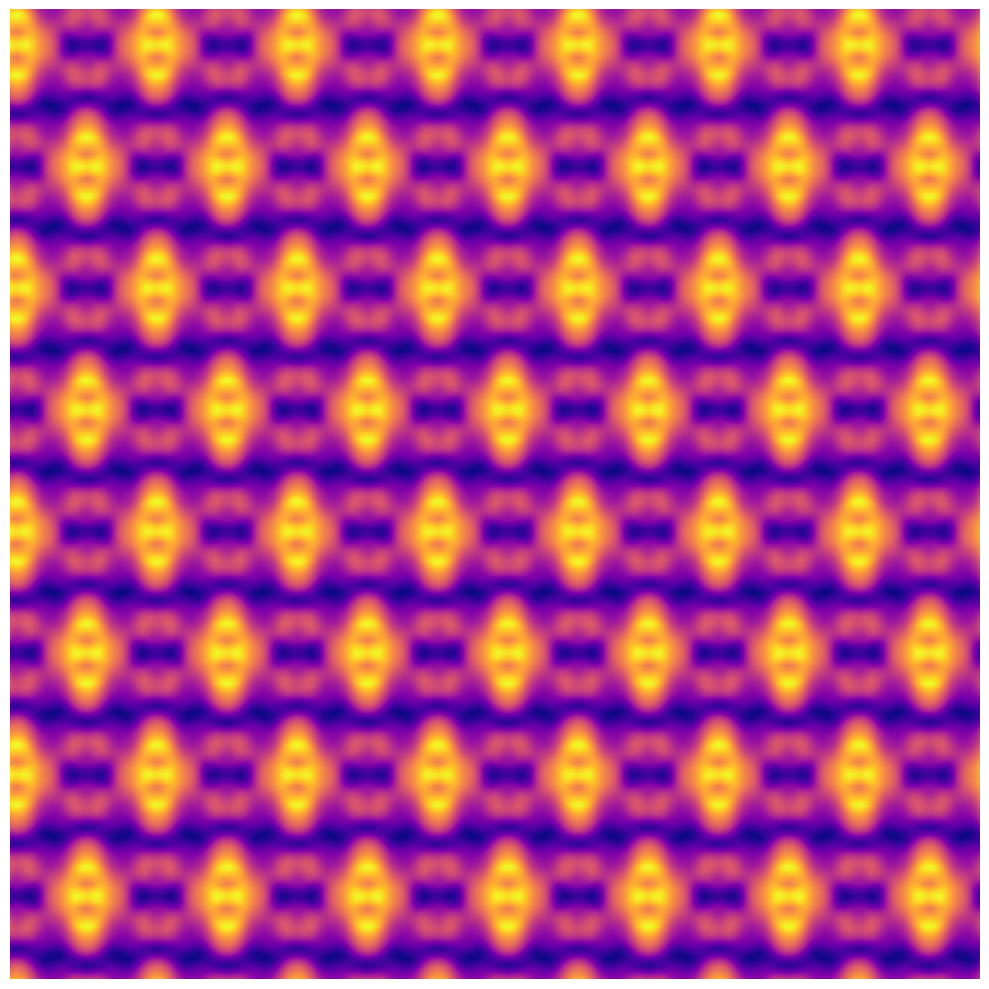

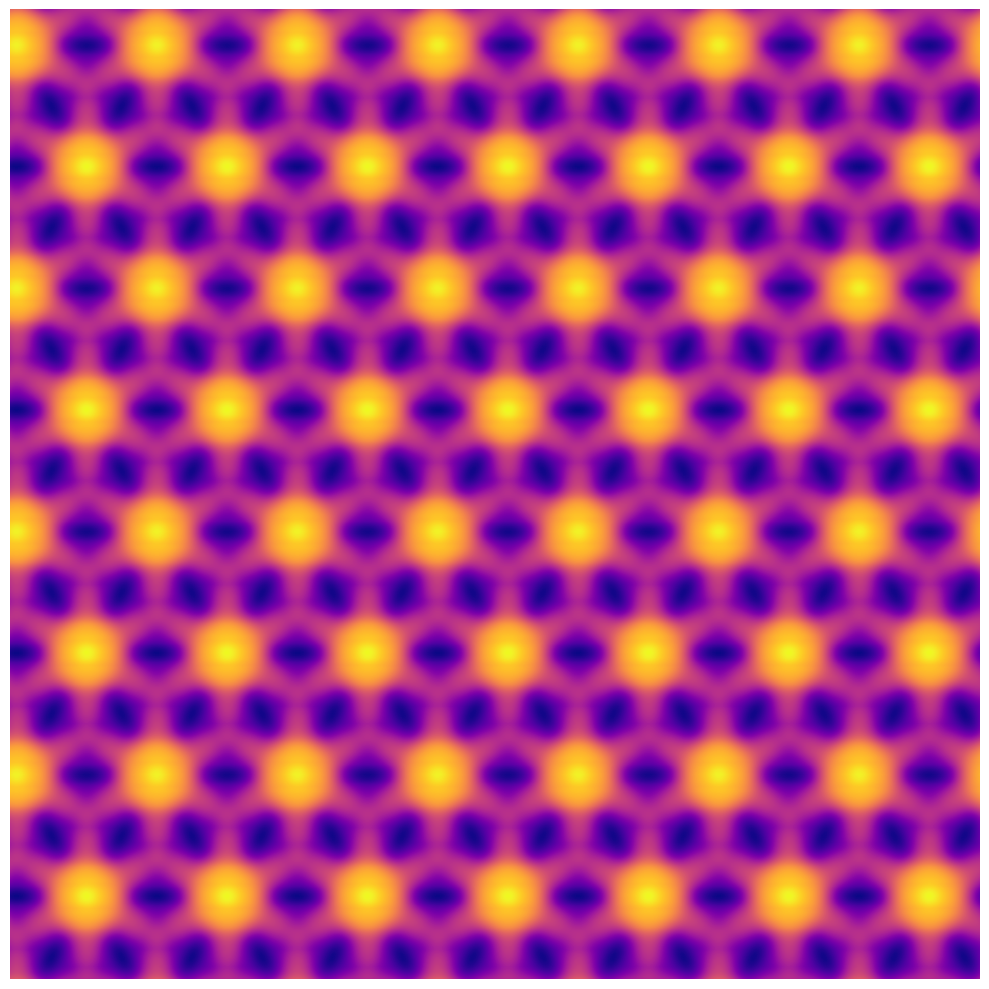

In [5]:
for pts in [1, 2, 4, 8, 360]:
    fig, ax = plt.subplots(figsize=(10, 10))
    plot_honeycomb(
        ax,
        n_pts=pts,
        cmap="plasma",
        angle_offset=45,
        diameter=90 * nm,
        phi=3,
        gap=2.5 * um,
        default_h=5 * nm,
        lim=(1 * um, 3.0 * um, 1 * um, 3.0 * um),
        spacing_bottom=200 * nm,
        show_mask=False,
    )
    plt.tight_layout()
    plt.savefig(f"subfigs-Fig1-d/honeycomb-{pts}pt-without-stencil.png")
    # inline drawing
    fig